In [1]:
import numpy as np
import seaborn as sns
import pylab as pb
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
%matplotlib inline

/home/jonas/opt/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
data = np.loadtxt("../data/ICA/DataICA.txt",skiprows=2)
data_orig = data

/home/jonas/opt/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


(-2, 4)

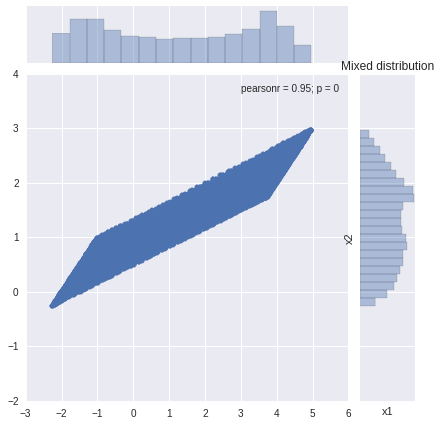

In [3]:
sns.jointplot(data[:,0],data[:,1])
pb.title("Mixed distribution")
pb.xlabel("x1")
pb.ylabel("x2")
pb.ylim(-2,4)

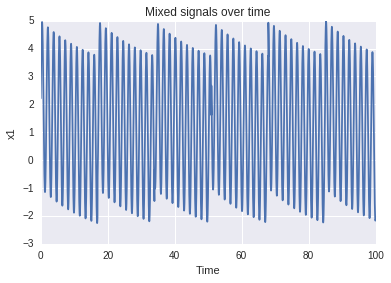

In [4]:
t = np.linspace(0,100,data.shape[0])
x1 = data[:,0]
x2 = data[:,1]
sns.plt.plot(t,x1)
pb.title("Mixed signals over time")
pb.ylabel("x1")
pb.xlabel("Time")
pb.savefig("../img/ICA_MixedSignals_X1.png")

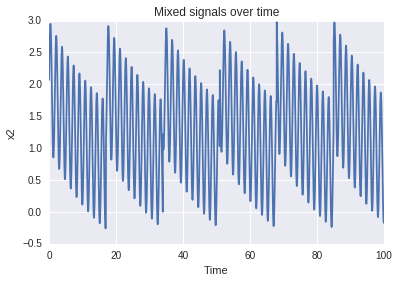

In [5]:
sns.plt.plot(t,x2)
pb.title("Mixed signals over time")
pb.ylabel("x2")
pb.xlabel("Time")
pb.savefig("../img/ICA_MixedSignals_X2.png")

# Centering
Center x by subtracting its mean vector **m** so as to make x a zero-mean variable. This implies that **s** is zero-mean as well. This preprocessing is made to simplify the ICA algorithms.

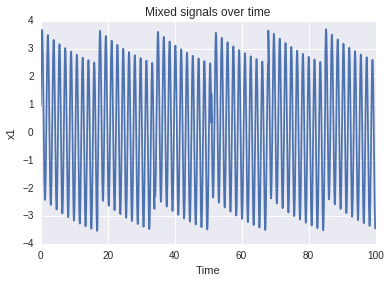

In [6]:
mean = np.mean(data,axis=0)
data = data - mean
sns.plt.plot(t,data[:,0])
pb.title("Mixed signals over time")
pb.ylabel("x1")
pb.xlabel("Time")
pb.savefig("../img/ICA_MixedSignals_X1_centered.png")


# Whitening
Another preprocessing method for whitening the observed variables. Use eigen-value decomposition (EVD) of the covariance matrix xx.T

/home/jonas/opt/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


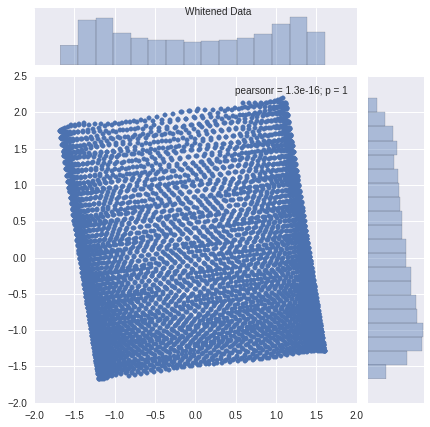

In [7]:
x_covariance = np.divide(np.dot(data.T,data),data.shape[0]-1) 
eig_val,E = np.linalg.eig(x_covariance)
D = np.sqrt(eig_val)
D = np.power(D,-1)
D = np.diag(D)

x_tilde = np.dot(np.dot(np.dot(E,D),E.T),data.T)
white_plot = sns.jointplot(x_tilde[0,:],x_tilde[1,:])
white_plot.fig.suptitle("Whitened Data")
white_plot.savefig("../img/ICA_Whitened_Data.png")

# Use the whitened data


# Show the Eigenvectors

/home/jonas/opt/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


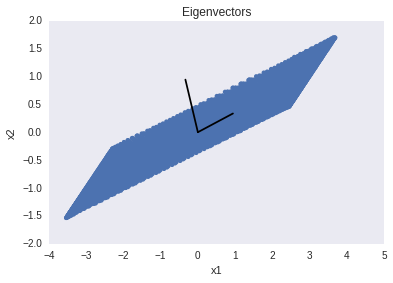

In [8]:
sns.set_style("dark")
plt.scatter(data[:,0],data[:,1],facecolors=sns.color_palette()[0],edgecolors='none')
#TODO: Fix the eigenvector plotting, doesn't seem correct
plt.plot([0,E[0][1]],[0,E[0][0]], color='black')
plt.plot([0,E[1][1]],[0,E[1][0]], color='black')
pb.title("Eigenvectors")
pb.xlabel("x1")
pb.ylabel("x2")
pb.savefig("../img/ICA_eigenvectors.png")

# Recover the Components

In [29]:
def f(u):
    return np.log(np.cosh(u))
def g_fun(u):
    return np.tanh(u)
def gp_fun(u):
    return 1 - np.power(np.tanh(u),2)

## Single Component Recovery

In [30]:
X = x_tilde
M = X.shape[1]
one = np.ones(M,)
w = np.random.normal(0,1,(2,))
wp = np.zeros(w.shape)
while(True):
    wp = np.dot(X,g_fun(np.dot(w.T,X)).T)/M - np.dot(np.dot(gp_fun(np.dot(w.T,X)),one),w)/M
    wp = wp/np.linalg.norm(wp)
    if np.dot(w,wp.T) == 1:
        w = wp
        break
    w = wp
w

array([-0.14117413,  0.98998478])

## Multiple Component Recovery

In [40]:
def fast_ica(X_, num_components=2):
    N = X_.shape[0]
    M = X_.shape[1]
    W = np.zeros((num_components,N))
    one = np.ones(M,)
    for p in range(num_components):
        w = np.random.normal(0,1,(2,))
        print("Iteration: " + str(p))
        print("W: " + str(W))
        print("w: " + str(w))
        
        while(True):
            W[p] = np.dot(X,g_fun(np.dot(w.T,X)).T)/M - np.dot(np.dot(gp_fun(np.dot(w.T,X)),one),w)/M
            W_sum = 0
            if p == 1:
                W_sum += np.dot(np.dot(W[0],W[1].T),W[0])
                print("W_sum: " + str(W_sum))
            W[p] = W[p] - W_sum
            W[p] = W[p]/np.linalg.norm(W[p])
            print("Convergence check: " + str(np.dot(w,W[p].T)))
            if np.dot(w,W[p].T) == 1.0:
                print("Converged: Component " + str(p) + "recovered!\n")
                w = W[p]
                break
            else:
                print("Didnt converge")
                w = W[p]
        W[p] = w
    S = np.dot(W, X_)
    return W, S 

In [41]:
print(x_tilde.shape)
W,S = fast_ica(x_tilde)
# S = np.dot(W.T, x_tilde)
print(W)
print(S.shape)


(2, 5000)
Iteration: 0
W: [[ 0.  0.]
 [ 0.  0.]]
w: [ 0.18768399  0.79439899]
Convergence check: 0.769582915282
Didnt converge
Convergence check: 1.0
Converged: Component 0recovered!

Iteration: 1
W: [[-0.14127383  0.98997056]
 [ 0.          0.        ]]
w: [-1.66477169  0.12423996]
W_sum: [ -2.42595479e-05   1.69997789e-04]
Convergence check: 1.63052310008
Didnt converge
W_sum: [ -6.95027366e-05   4.87037582e-04]
Convergence check: 1.0
Converged: Component 1recovered!

[[-0.14127383  0.98997056]
 [-0.98997056 -0.14127383]]
(2, 5000)


### Plot S1

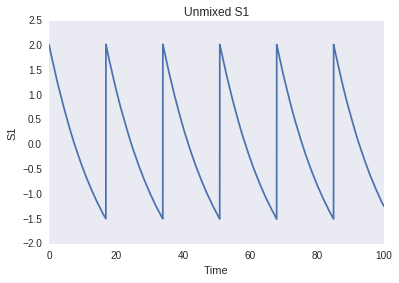

In [61]:
#Line Plot
sns.plt.plot(t,S[0,:])
pb.title("Unmixed S1")
pb.ylabel("S1")
pb.xlabel("Time")

/home/jonas/opt/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


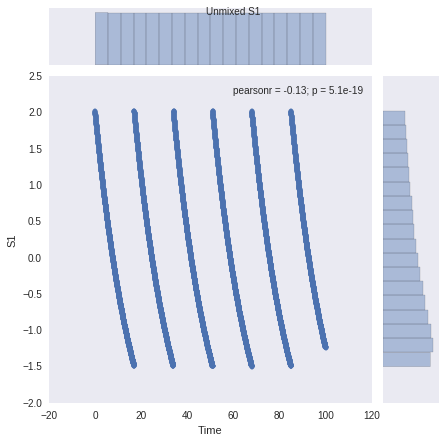

In [62]:
#Scatter Plot
g = sns.jointplot(t,S[0,:])
g.fig.suptitle("Unmixed S1")
g.set_axis_labels("Time", "S1")
g.savefig("../img/ICA_Recovered_S1.png")

### Plot S2

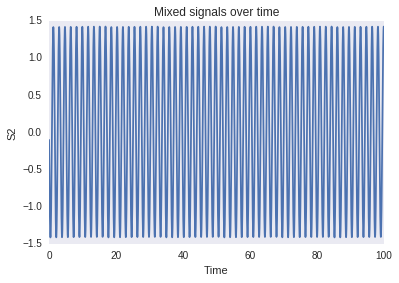

In [63]:
#Line Plot
sns.plt.plot(t,S[1,:])
pb.title("Mixed signals over time")
pb.ylabel("S2")
pb.xlabel("Time")

/home/jonas/opt/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


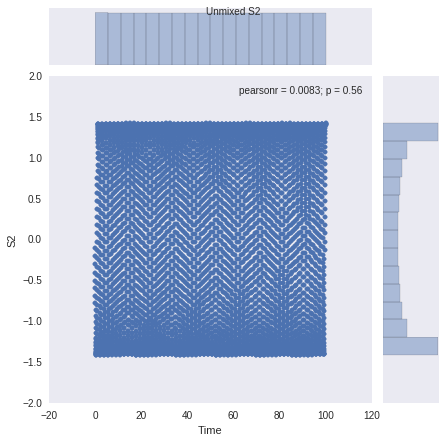

In [64]:
#Scatter Plot
g = sns.jointplot(t,S[1,:])
g.fig.suptitle("Unmixed S2")
g.set_axis_labels("Time", "S2")
g.savefig("../img/ICA_Recovered_S2.png")

### Plot S1 vs S2

/home/jonas/opt/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


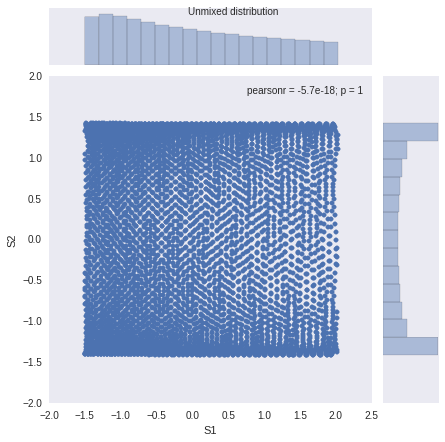

In [65]:
g = sns.jointplot(S[0,:],S[1,:])
g.fig.suptitle("Unmixed distribution")
g.set_axis_labels("S1", "S2")
g.savefig("../img/ICA_UnmixedSignals.png")